<a href="https://colab.research.google.com/github/shujahameed/Canny-Edge-Detector/blob/main/Canny_Edge_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from skimage import io
import cv2 as cv
from google.colab.patches import cv2_imshow
from PIL import Image 
import matplotlib.pylab as plt

GOOGLE_COLAB = True
path = "https://drive.google.com/drive/u/2/folders/1B3er5zYNt08_N63DmxAgDZQVNF3XgM5w"
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/Computer Vision Spring 21/Assgn1/"



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
input_1 = path+"image1.jpg"
img1 = cv2.imread(input_1,1)
cv2_imshow(img1)
print('\n')


In [ ]:
def CED(image, low_thr = None, upper_thr = None):
	
  #convert RGB to grayscale
  image = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  cv2_imshow(image)
  print('\n')
  
  #Apply Gaussian Filter of size 3x3 to reduce noise
  image = cv2.GaussianBlur(image, (3, 3), 0)
  cv2_imshow(image)
  print('\n')
  
  #gradient in x direction
  grad_x = cv2.Sobel(np.float32(image), cv2.CV_64F, 1, 0, 3) #horizontal gradient
  cv2_imshow(grad_x)
  print('\n')
  
  #gradient in y direction
  grad_y = cv2.Sobel(np.float32(image), cv2.CV_64F, 0, 1, 3) #vertical gradient
  cv2_imshow(grad_y)
  print('\n')

  mag, ang = cv2.cartToPolar(grad_x, grad_y, angleInDegrees = True) 
	
	# setting the minimum and maximum thresholds
	# for double thresholding
  mag_max = np.max(mag)
  if not low_thr:low_thr = mag_max * 0.1
  if not upper_thr:upper_thr = mag_max * 0.5
	
  h, w = image.shape #image dimensions
	
  for i in range(w):
    for j in range(h):
      grad_ang = ang[j, i]
      grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
			
      if grad_ang<= 22.5:
        neighb_1_x, neighb_1_y = i- 1, j
        neighb_2_x, neighb_2_y = i + 1, j
			
			# top right (diagnol-1) direction
      elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
        neighb_1_x, neighb_1_y = i - 1, j - 1
        neighb_2_x, neighb_2_y = i + 1, j + 1
			
			# In y-axis direction
      elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
        neighb_1_x, neighb_1_y = i , j - 1
        neighb_2_x, neighb_2_y = i , j + 1
			
			# top left (diagnol-2) direction
      elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
        neighb_1_x, neighb_1_y = i - 1, j + 1
        neighb_2_x, neighb_2_y = i + 1, j - 1
			
			# Now it restarts the cycle
      elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
        neighb_1_x, neighb_1_y = i - 1, j
        neighb_2_x, neighb_2_y = i + 1, j
			
			# Non-maximum suppression step
      if w>neighb_1_x>= 0 and h>neighb_1_y>= 0:
        if mag[j, i]<mag[neighb_1_y, neighb_1_x]:
          mag[j, i]= 0
          continue

      if w>neighb_2_x>= 0 and h>neighb_2_y>= 0:
        if mag[j, i]<mag[neighb_2_y, neighb_2_x]:
          mag[j, i]= 0

  cv2_imshow(mag)
  print('\n')
  weak_ids = np.zeros_like(image)
  strong_ids = np.zeros_like(image)
  ids = np.zeros_like(image)
	


	# double thresholding step
  for i in range(w):
    for j in range(h):
      grad_mag = mag[j, i]
      if grad_mag<low_thr:
        mag[j, i]= 0
      elif upper_thr>grad_mag>= low_thr:
        ids[j, i]= 1
      else:
        ids[j, i]= 2
	
  return mag

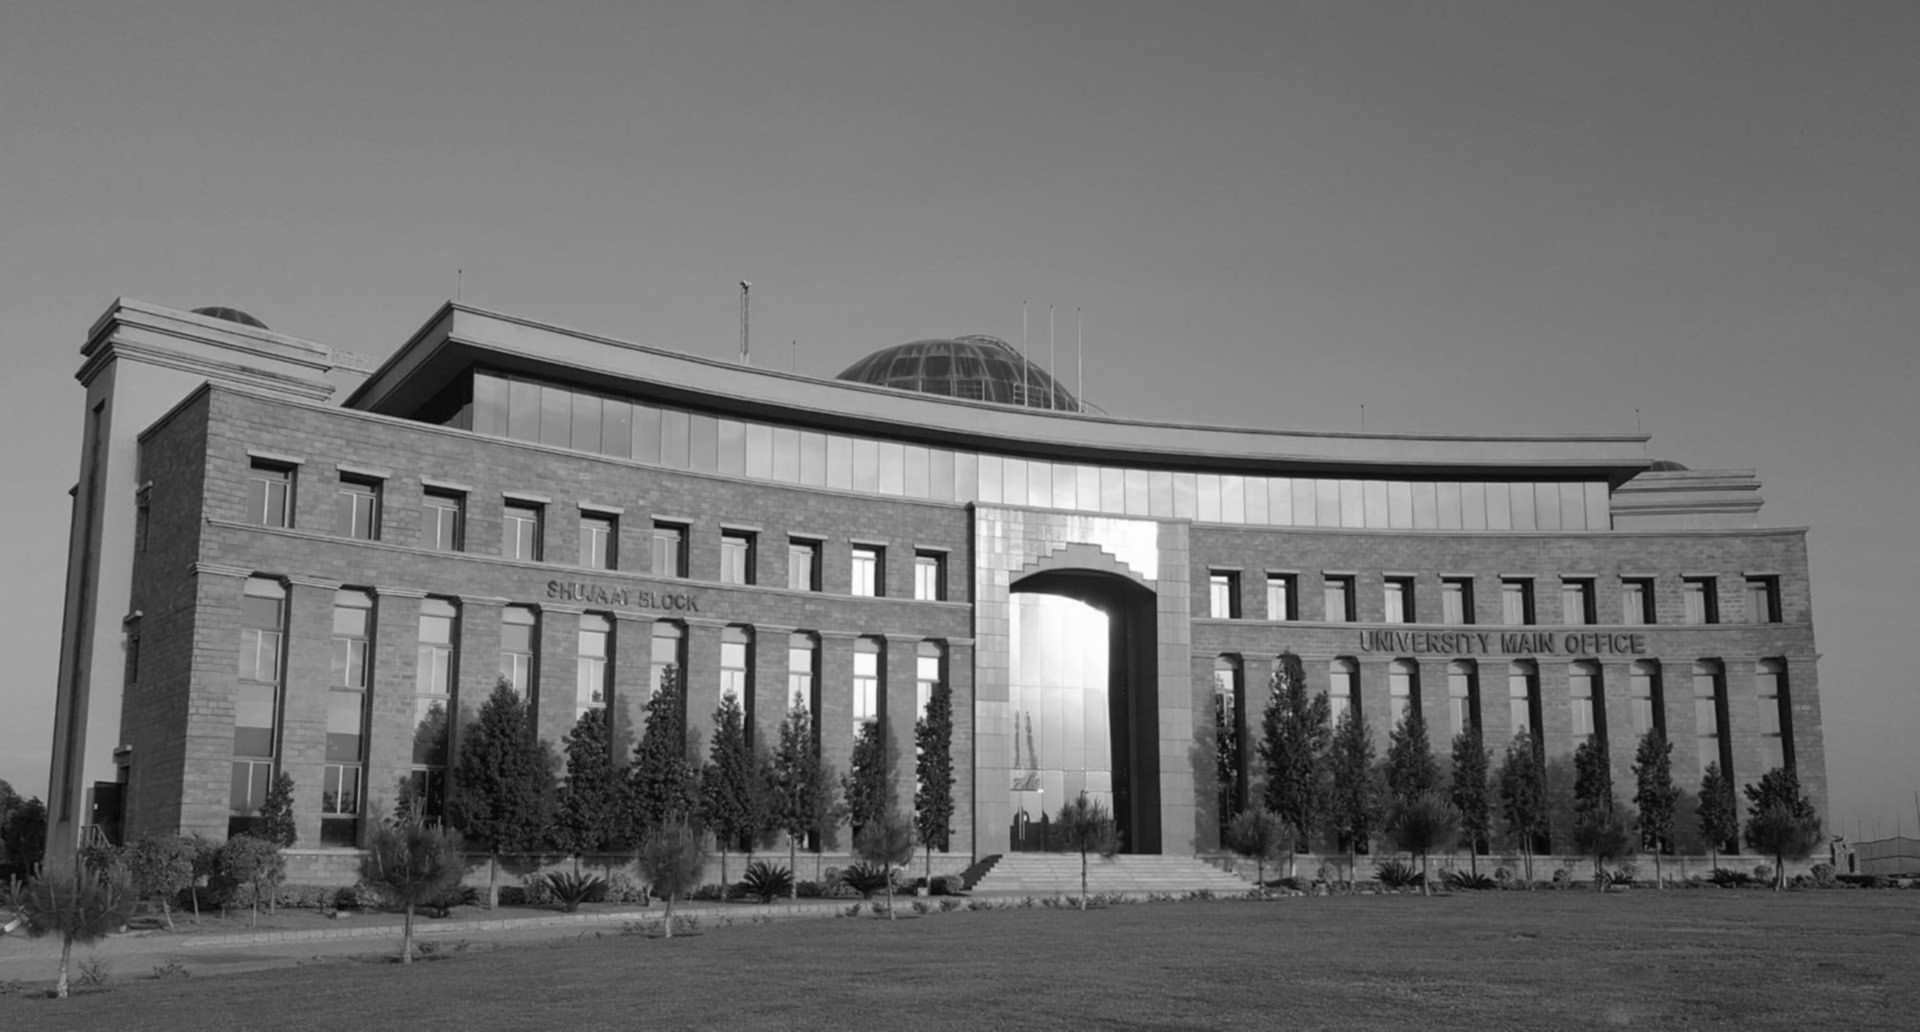

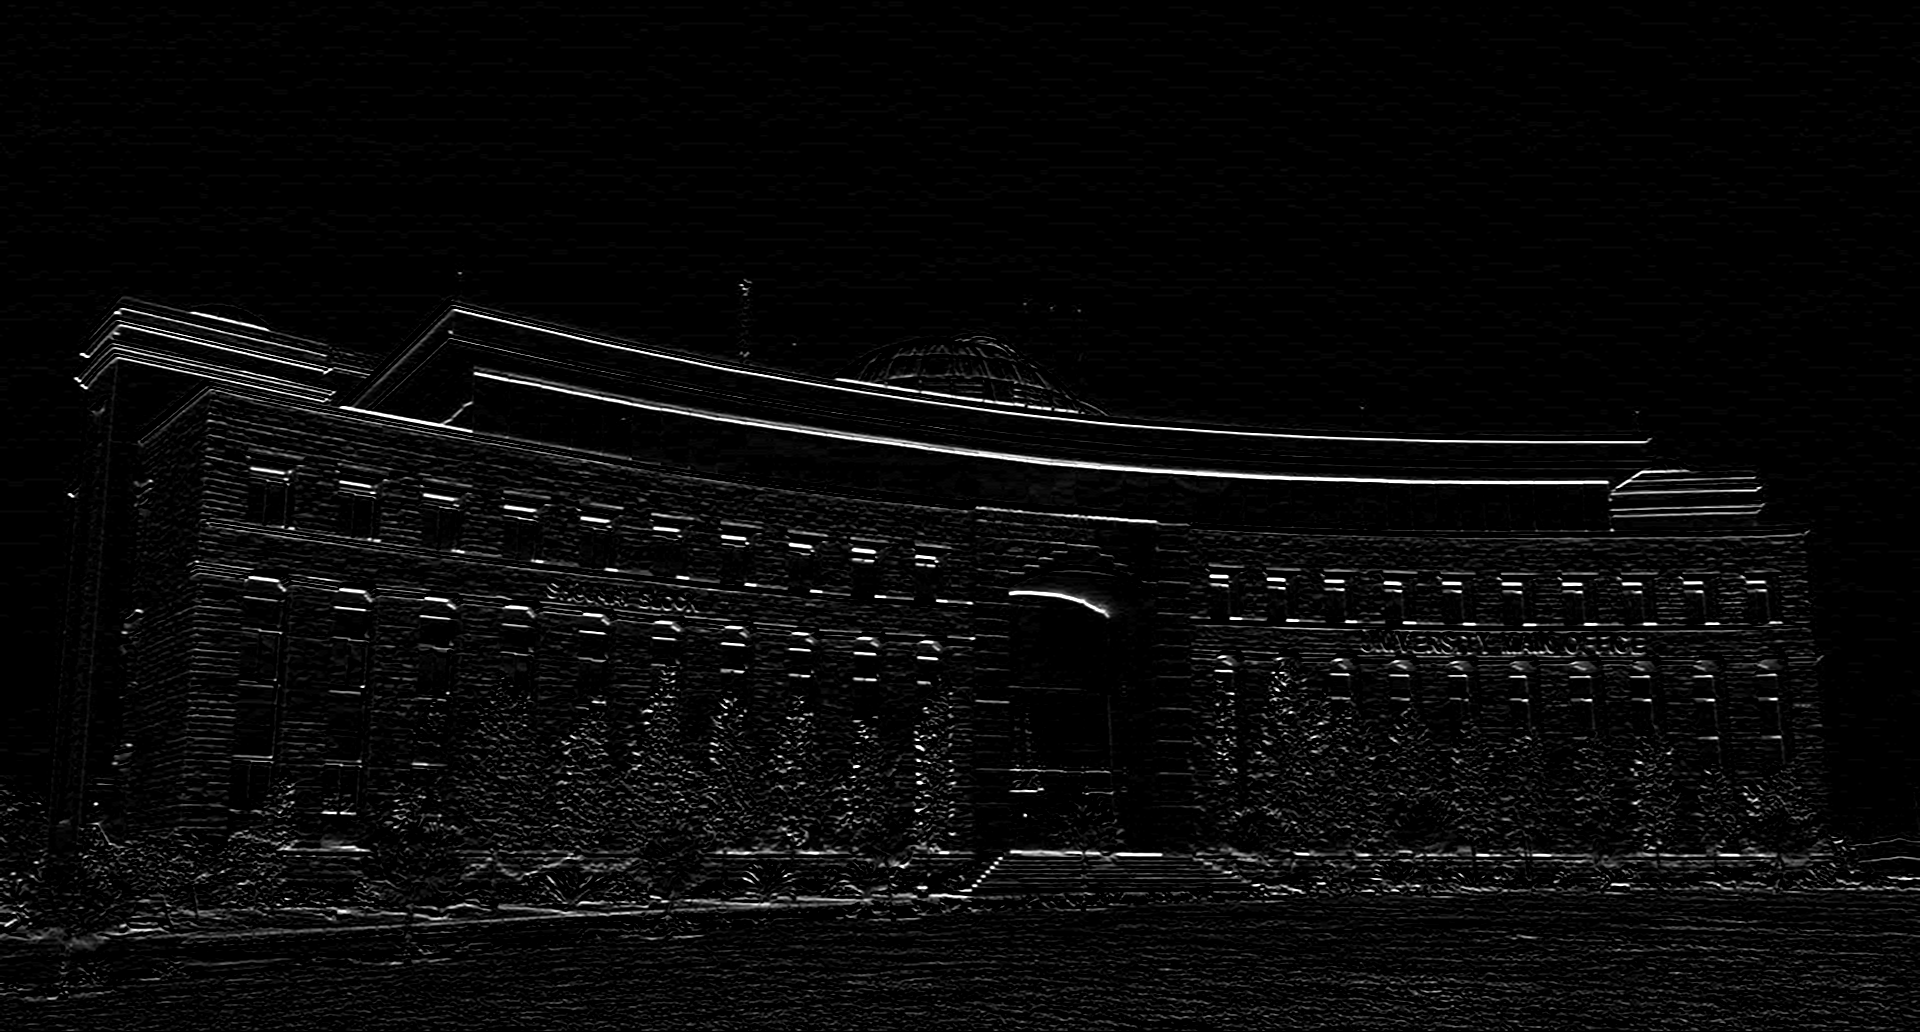

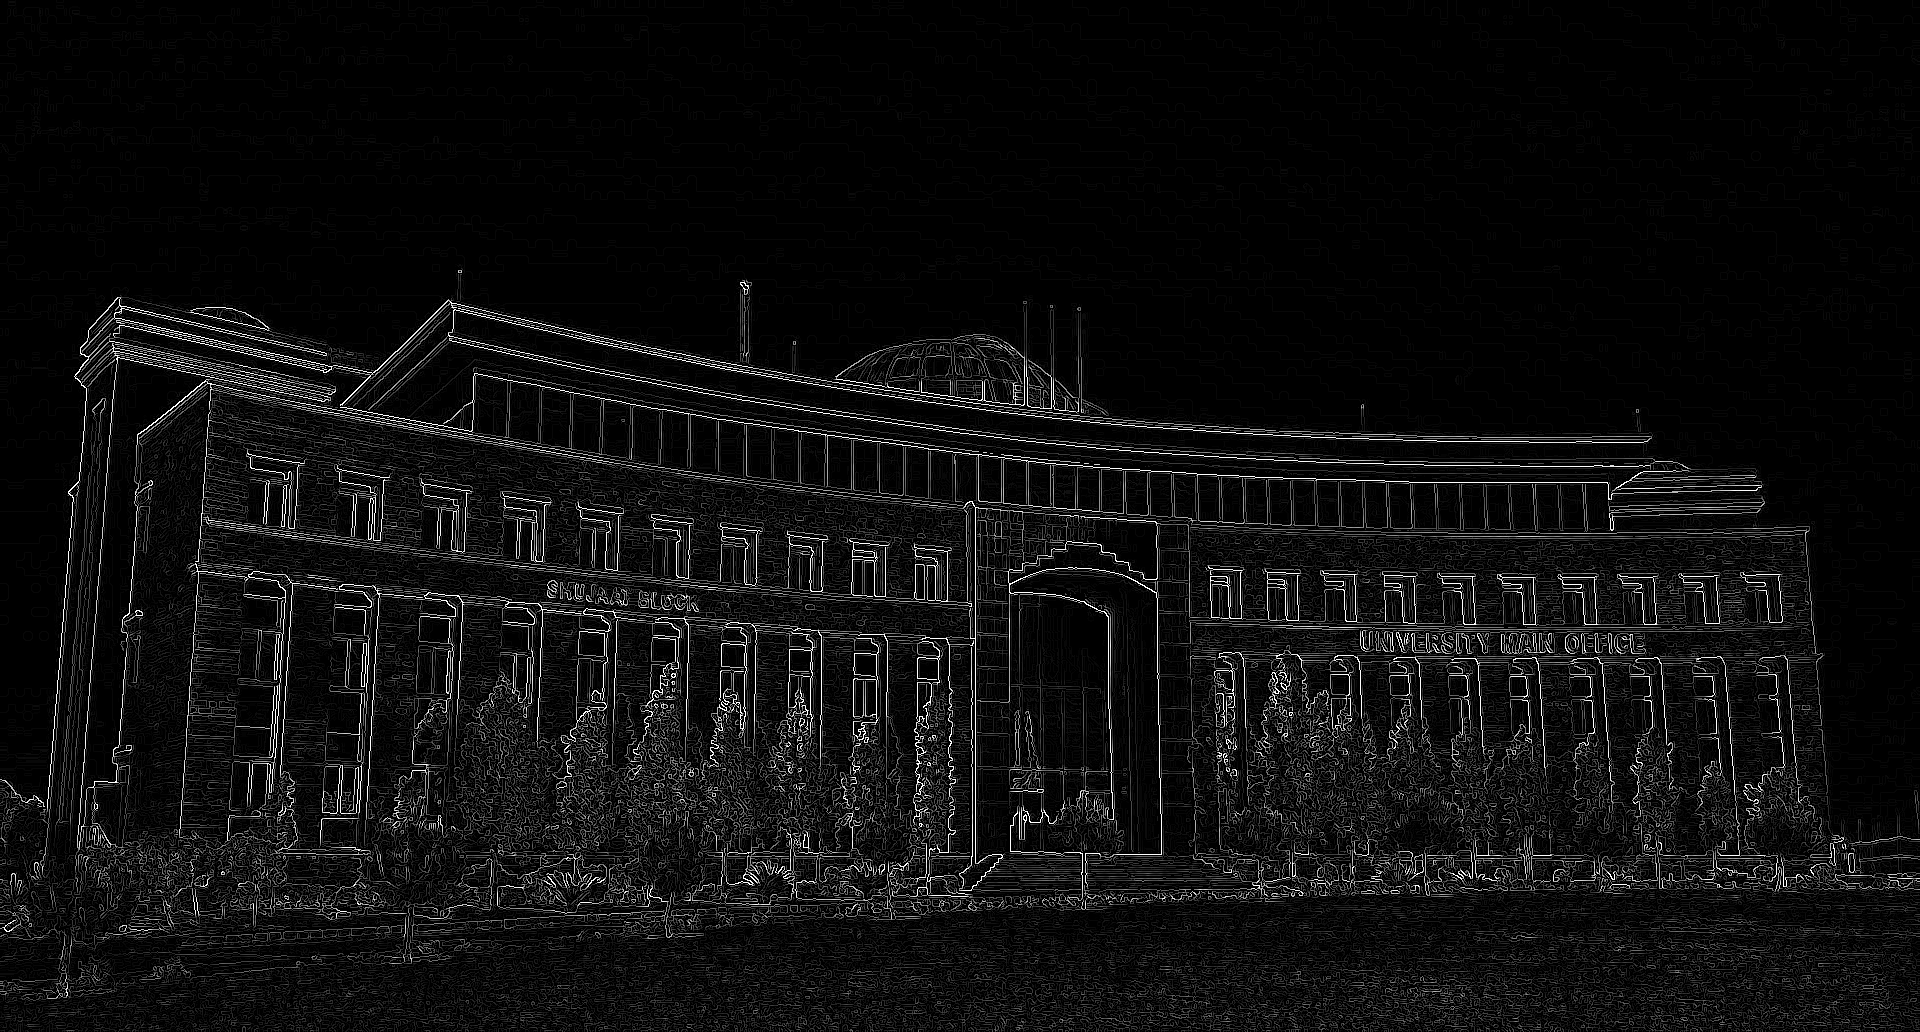

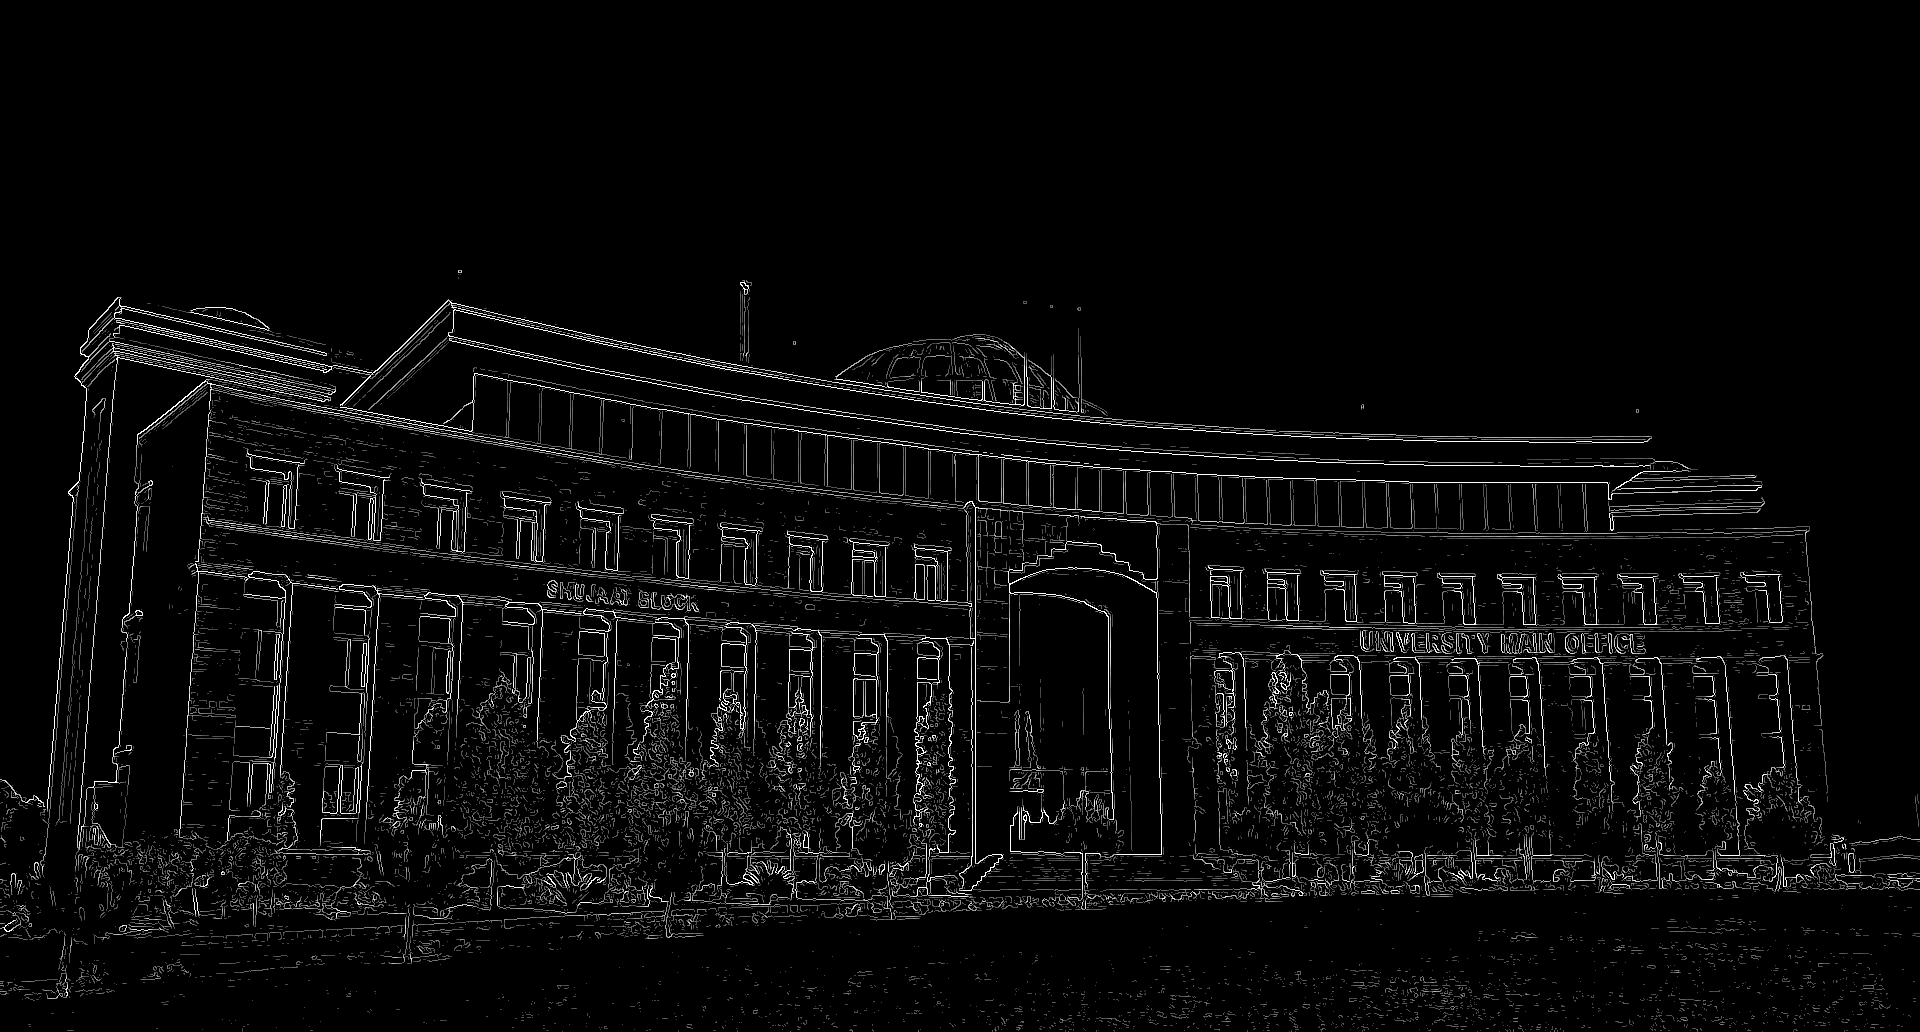

In [ ]:
canny_img = CED(img1)
cv2_imshow(canny_img)
print('\n')